# Exchange Rates

In [50]:
from urllib.request import urlopen
from xmltodict import parse
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as url:
    raw = parse(url.read().decode('utf8'))

raw

{'gesmes:Envelope': {'@xmlns:gesmes': 'http://www.gesmes.org/xml/2002-08-01',
  '@xmlns': 'http://www.ecb.int/vocabulary/2002-08-01/eurofxref',
  'gesmes:subject': 'Reference rates',
  'gesmes:Sender': {'gesmes:name': 'European Central Bank'},
  'Cube': {'Cube': {'@time': '2022-10-07',
    'Cube': [{'@currency': 'USD', '@rate': '0.9797'},
     {'@currency': 'JPY', '@rate': '141.92'},
     {'@currency': 'BGN', '@rate': '1.9558'},
     {'@currency': 'CZK', '@rate': '24.517'},
     {'@currency': 'DKK', '@rate': '7.4381'},
     {'@currency': 'GBP', '@rate': '0.87383'},
     {'@currency': 'HUF', '@rate': '423.85'},
     {'@currency': 'PLN', '@rate': '4.8595'},
     {'@currency': 'RON', '@rate': '4.9415'},
     {'@currency': 'SEK', '@rate': '10.8555'},
     {'@currency': 'CHF', '@rate': '0.9700'},
     {'@currency': 'ISK', '@rate': '140.70'},
     {'@currency': 'NOK', '@rate': '10.4498'},
     {'@currency': 'HRK', '@rate': '7.5270'},
     {'@currency': 'TRY', '@rate': '18.2090'},
     {'@cur

In [52]:
raw['gesmes:Envelope']['Cube']['Cube']['Cube']

[{'@currency': 'USD', '@rate': '0.9797'},
 {'@currency': 'JPY', '@rate': '141.92'},
 {'@currency': 'BGN', '@rate': '1.9558'},
 {'@currency': 'CZK', '@rate': '24.517'},
 {'@currency': 'DKK', '@rate': '7.4381'},
 {'@currency': 'GBP', '@rate': '0.87383'},
 {'@currency': 'HUF', '@rate': '423.85'},
 {'@currency': 'PLN', '@rate': '4.8595'},
 {'@currency': 'RON', '@rate': '4.9415'},
 {'@currency': 'SEK', '@rate': '10.8555'},
 {'@currency': 'CHF', '@rate': '0.9700'},
 {'@currency': 'ISK', '@rate': '140.70'},
 {'@currency': 'NOK', '@rate': '10.4498'},
 {'@currency': 'HRK', '@rate': '7.5270'},
 {'@currency': 'TRY', '@rate': '18.2090'},
 {'@currency': 'AUD', '@rate': '1.5266'},
 {'@currency': 'BRL', '@rate': '5.1075'},
 {'@currency': 'CAD', '@rate': '1.3437'},
 {'@currency': 'CNY', '@rate': '6.9715'},
 {'@currency': 'HKD', '@rate': '7.6906'},
 {'@currency': 'IDR', '@rate': '14933.14'},
 {'@currency': 'ILS', '@rate': '3.4477'},
 {'@currency': 'INR', '@rate': '80.5460'},
 {'@currency': 'KRW', '@rat

In [53]:
rates = {x['@currency']: float(x['@rate']) for x in raw['gesmes:Envelope']['Cube']['Cube']['Cube']}
rates

{'USD': 0.9797,
 'JPY': 141.92,
 'BGN': 1.9558,
 'CZK': 24.517,
 'DKK': 7.4381,
 'GBP': 0.87383,
 'HUF': 423.85,
 'PLN': 4.8595,
 'RON': 4.9415,
 'SEK': 10.8555,
 'CHF': 0.97,
 'ISK': 140.7,
 'NOK': 10.4498,
 'HRK': 7.527,
 'TRY': 18.209,
 'AUD': 1.5266,
 'BRL': 5.1075,
 'CAD': 1.3437,
 'CNY': 6.9715,
 'HKD': 7.6906,
 'IDR': 14933.14,
 'ILS': 3.4477,
 'INR': 80.546,
 'KRW': 1381.42,
 'MXN': 19.643,
 'MYR': 4.5556,
 'NZD': 1.7328,
 'PHP': 57.747,
 'SGD': 1.3996,
 'THB': 36.602,
 'ZAR': 17.6222}

In [54]:
rates['TRY']

18.209

In [55]:
def getExchangeRates():
    with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as conn:
        raw = parse(conn.read().decode('utf8'))
    rates = {x['@currency']: float(x['@rate']) for x in raw['gesmes:Envelope']['Cube']['Cube']['Cube']}
    return(rates)

In [56]:
rates = getExchangeRates()
rates['USD']

0.9797

In [57]:
from email import message


def QueryECB(Cfrom, Cto):
    with urlopen("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D." + Cfrom + "." + Cto + ".SP00.A") as url:
        raw = parse(url.read().decode('utf8'))
    data = raw['message:GenericData']['message:DataSet']['generic:Series']['generic:Obs']
    dates = [x['generic:ObsDimension']['@value'] for x in data]
    rates = [float(x['generic:ObsValue']['@value']) for x in data]
    return pd.DataFrame({'Date': dates, 'Rate': rates})

CADEUR = QueryECB('CAD', 'EUR')
CADEUR

,Date,Rate
0,1999-01-04,1.8004
1,1999-01-05,1.7965
2,1999-01-06,1.7711
3,1999-01-07,1.7602
4,1999-01-08,1.7643
...,...,...
6145,2022-10-03,1.3412
6146,2022-10-04,1.3503
6147,2022-10-05,1.3493
6148,2022-10-06,1.3475


<AxesSubplot:xlabel='Date'>

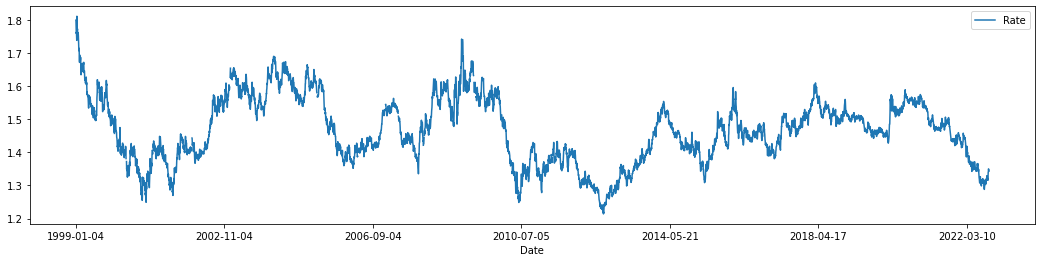

In [58]:
CADEUR.plot(figsize=(18,4), x = 'Date', y = 'Rate')